In [1]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd

# Import data 
df = pd.read_csv('translation_control_data.csv', sep=',', encoding = 'ISO-8859-1')

#Insert empy row called WHBS into position 5
df.insert( 6, 'WHBS', '0')
#DataFrame.insert(loc, column, value, allow_duplicates=False)


#print(df.shape)
df.head(25)

,name,ON,OFF,x_fold,dG_all,dG_stem,WHBS,five_stem,three_stem,len_five,len_three,same_length
0,TT-17,64.9,14.5,5.1,-41.6,-39.2,0,UCCGCGCGCGCGCCGC,GCGGCGCGCGCGCGGA,16,16,WAHR
1,TT-8,61.3,10.4,6.1,-36.2,-33.4,0,UCCGCGCGCGCCGC,GCGGCGCGCGCGGA,14,14,WAHR
2,TT-2,80.5,12.4,6.7,-30.8,-27.6,0,UCCGCGCGCCGC,GCGGCGCGCGGA,12,12,WAHR
3,TT-20,95.2,15.6,6.5,-28.3,-25.1,0,UCCCGCGCCGC,GCGGCGCGGGA,11,11,WAHR
4,TT-6,103.4,18.9,5.7,-25.4,-21.8,0,UCCGCGCCGC,GCGGCGCGGA,10,10,WAHR
5,TT-19,101.6,12.1,8.5,-22.9,-19.3,0,UCCCGCCGC,GCGGCGGGA,9,9,WAHR
6,TT-27,119.0,18.4,6.5,-19.9,-16.0,0,UCCGCCGC,GCGGCGGA,8,8,WAHR
7,TT-28,98.9,19.2,5.2,-17.4,-13.5,0,UCCCCGC,GCGGGGA,7,7,WAHR
8,TT-31,122.9,54.9,2.3,-14.6,-10.2,0,UCCCGC,GCGGGA,6,6,WAHR
9,TT-10,91.0,30.2,3.0,-27.4,-23.9,0,UCCGCGCGAAGC,GCUUCGCGCGGA,12,12,WAHR


/Users/flo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/flo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3020: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


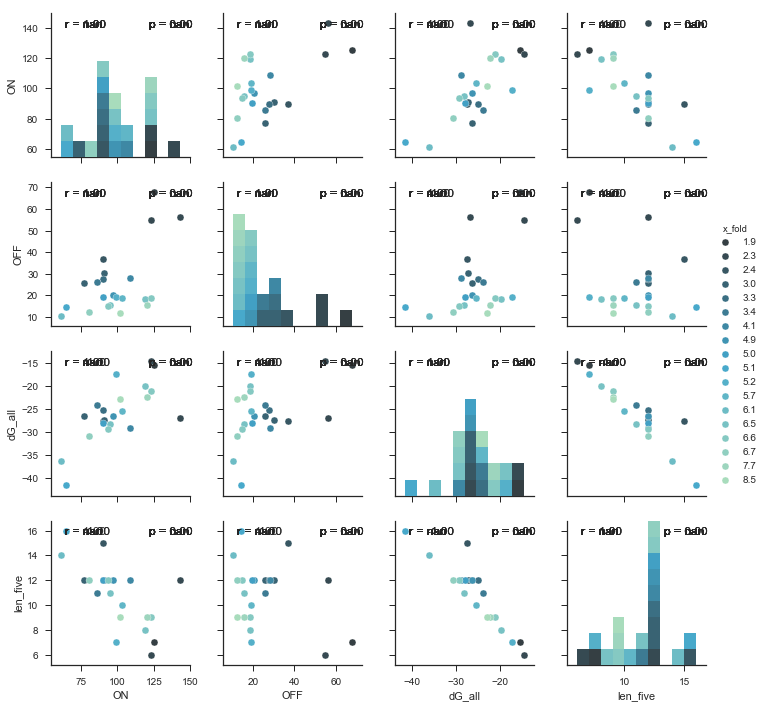

In [2]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.2f}".format(p),
                xy=(.7, .9), xycoords=ax.transAxes)


graph = sns.pairplot(df, vars=['ON', 'OFF', 'dG_all', 'len_five'], hue='x_fold', palette="GnBu_d")
graph.map(corrfunc);

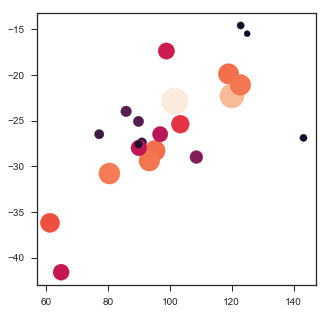

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(df.ON, df.dG_all, alpha=1, c=df.x_fold, s=df.x_fold*df.x_fold*10, edgecolors='face');

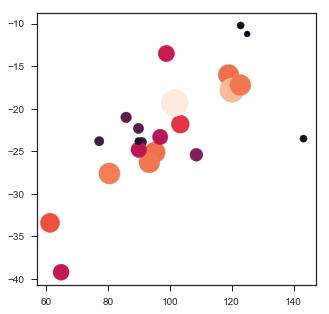

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(df.ON, df.dG_stem, alpha=1, c=df.x_fold, s=df.x_fold*df.x_fold*10, edgecolors='face');

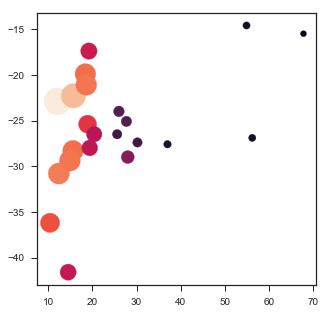

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df.OFF, df.dG_all, alpha=1, c=df.x_fold, s=df.x_fold*df.x_fold*10, edgecolors='face');

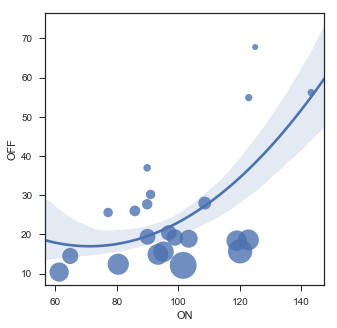

In [6]:
plt.figure(figsize=(5,5))
sns.regplot(x=df.ON, y=df.OFF, order=2, ci=68, 
            scatter_kws={'s': df.x_fold*df.x_fold*10, 'color': 'b'}, 
            truncate=False);

In [7]:
# WHBS
import numpy as np


def calculate_weight(index=1):
    return 1/np.sqrt(index+0.5)
    
bp_Hbonds = {
    'GC': 3,
    'CG': 3,
    'AU': 2,
    'UA': 2,
    'GU': 1,
    'UG': 1,    
    'GA': -0.5,
    'AG': -0.5,
    'AA': -0.5,
}    
    
stacking_strength = {
    # to do!
}
    
for index, row in df.iterrows():
    five_stem = row['five_stem'] 
    three_stem = row['three_stem'][::-1]  # reverse sequence
    WHBS = 0
    
    for i in range(len(five_stem)):
        current_bp = five_stem[i] + three_stem[i]
        
        if current_bp in bp_Hbonds:
            WHBS = WHBS + (bp_Hbonds[current_bp] * calculate_weight(index))
        else:
            WHBS = WHBS + 0  # or add an negative weighted value for penalty if not pairing
    
    # Insert calculated WHBS into df
    df.iat[index, 6] = '{:.3f}'.format(WHBS) 

# After insertion of values in WHBS, WHBS is object. Convert to float.    
df['WHBS'] = df.WHBS.astype(float)

df.head(20)

,name,ON,OFF,x_fold,dG_all,dG_stem,WHBS,five_stem,three_stem,len_five,len_three,same_length
0,TT-17,64.9,14.5,5.1,-41.6,-39.2,66.468,UCCGCGCGCGCGCCGC,GCGGCGCGCGCGCGGA,16,16,WAHR
1,TT-8,61.3,10.4,6.1,-36.2,-33.4,33.476,UCCGCGCGCGCCGC,GCGGCGCGCGCGGA,14,14,WAHR
2,TT-2,80.5,12.4,6.7,-30.8,-27.6,22.136,UCCGCGCGCCGC,GCGGCGCGCGGA,12,12,WAHR
3,TT-20,95.2,15.6,6.5,-28.3,-25.1,17.105,UCCCGCGCCGC,GCGGCGCGGGA,11,11,WAHR
4,TT-6,103.4,18.9,5.7,-25.4,-21.8,13.671,UCCGCGCCGC,GCGGCGCGGA,10,10,WAHR
5,TT-19,101.6,12.1,8.5,-22.9,-19.3,11.086,UCCCGCCGC,GCGGCGGGA,9,9,WAHR
6,TT-27,119.0,18.4,6.5,-19.9,-16.0,9.021,UCCGCCGC,GCGGCGGA,8,8,WAHR
7,TT-28,98.9,19.2,5.2,-17.4,-13.5,7.303,UCCCCGC,GCGGGGA,7,7,WAHR
8,TT-31,122.9,54.9,2.3,-14.6,-10.2,5.831,UCCCGC,GCGGGA,6,6,WAHR
9,TT-10,91.0,30.2,3.0,-27.4,-23.9,10.707,UCCGCGCGAAGC,GCUUCGCGCGGA,12,12,WAHR


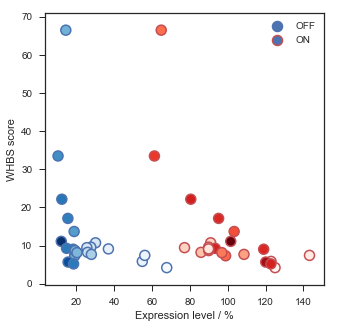

In [8]:
plt.figure(figsize=(5,5))
A = plt.scatter(df.OFF, df.WHBS, c=df.x_fold, s=100, cmap='Blues', edgecolor='b', linewidth=1.5, label='OFF')
B = plt.scatter(df.ON,  df.WHBS, c=df.x_fold, s=100, cmap='Reds',  edgecolor='r', linewidth=1.5, label='ON')
plt.xlabel('Expression level / %')
plt.ylabel('WHBS score')
plt.legend((A, B), ('OFF', 'ON'), loc=0);

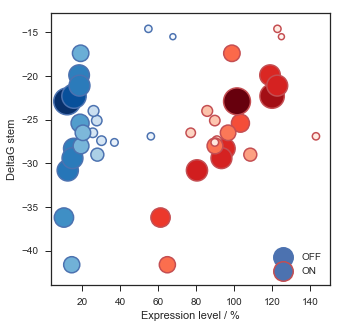

In [9]:

plt.figure(figsize=(5,5))
A = plt.scatter(df.OFF, df.dG_all, c=df.x_fold, s=df.x_fold*df.x_fold*10, cmap='Blues', edgecolor='b', linewidth=1.5, label='OFF')
B = plt.scatter(df.ON,  df.dG_all, c=df.x_fold, s=df.x_fold*df.x_fold*10, cmap='Reds',  edgecolor='r', linewidth=1.5, label='ON')
plt.xlabel('Expression level / %')
plt.ylabel('DeltaG all')


plt.legend((A, B), ('OFF', 'ON'), loc=4);

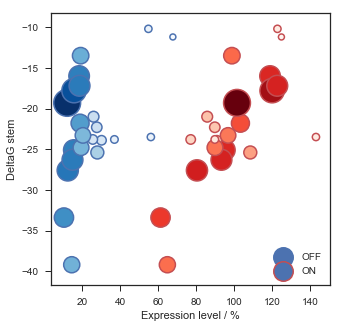

In [10]:

plt.figure(figsize=(5,5))
A = plt.scatter(df.OFF, df.dG_stem, c=df.x_fold, s=df.x_fold*df.x_fold*10, cmap='Blues', edgecolor='b', linewidth=1.5, label='OFF')
B = plt.scatter(df.ON,  df.dG_stem, c=df.x_fold, s=df.x_fold*df.x_fold*10, cmap='Reds',  edgecolor='r', linewidth=1.5, label='ON')
plt.xlabel('Expression level / %')
plt.ylabel('DeltaG stem')


plt.legend((A, B), ('OFF', 'ON'), loc=4);

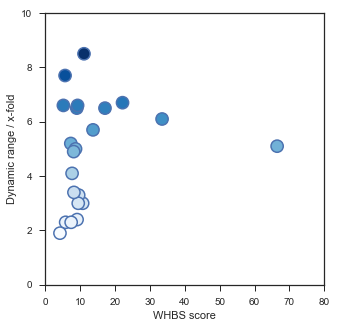

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(df.WHBS, df.x_fold, c=df.x_fold, s=150, cmap='Blues', edgecolor='b', linewidth=1.5, label='OFF')
plt.xlabel('WHBS score')
plt.ylabel('Dynamic range / x-fold')
plt.xlim(0, 80)
plt.ylim(0, 10);
#plt.xscale('log');


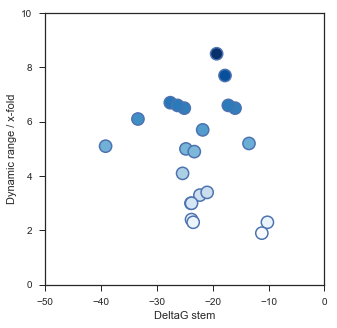

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(df.dG_stem, df.x_fold, c=df.x_fold, s=150, cmap='Blues', edgecolor='b', linewidth=1.5, label='OFF')
plt.xlabel('DeltaG stem')
plt.ylabel('Dynamic range / x-fold')
plt.xlim(-50, 0)
plt.ylim(0, 10);
#plt.xscale('log');
